# Volatility-Forecasting-in-India
Starter notebook for the Volatility-Forecasting-in-India project.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Everything is installed ✅")

# Paths
DATA_PATH = "../data/raw"
OUTPUT_PATH = "../outputs"
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Load Excel data
data_file = os.path.join(DATA_PATH, "volatility_data.xlsx")

try:
    df = pd.read_excel(data_file, engine='openpyxl')
    print("Data loaded successfully ✅")
    display(df.head())
except FileNotFoundError:
    print(f"File not found: {data_file}")

# Folder for raw data
os.makedirs("data/raw", exist_ok=True)

# Mock data
data = {
    "date": pd.date_range(start="2025-01-01", periods=10, freq="B"),
    "open": [100, 102, 101, 103, 105, 104, 106, 107, 108, 109],
    "high": [101, 103, 102, 104, 106, 105, 107, 108, 109, 110],
    "low": [99, 101, 100, 102, 104, 103, 105, 106, 107, 108],
    "close": [100.5, 102.5, 101.5, 103.5, 105.5, 104.5, 106.5, 107.5, 108.5, 109.5],
    "volume": [1000, 1200, 1100, 1300, 1250, 1400, 1350, 1500, 1450, 1600]
}

df = pd.DataFrame(data)

# Save to Excel
df.to_excel("data/raw/volatility_data.xlsx", index=False)


Everything is installed ✅
File not found: ../data/raw/volatility_data.xlsx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   open    10 non-null     int64         
 2   high    10 non-null     int64         
 3   low     10 non-null     int64         
 4   close   10 non-null     float64       
 5   volume  10 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 612.0 bytes
None
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


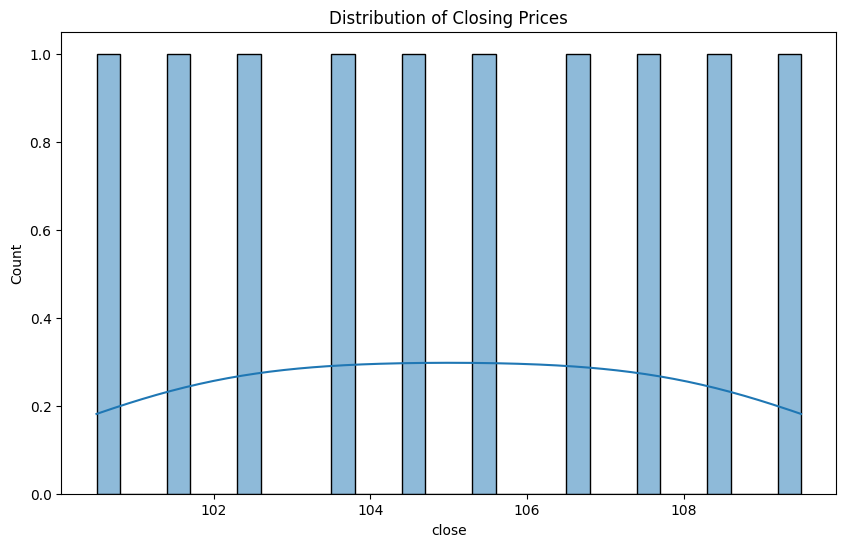

In [7]:
# Info and missing values
print(df.info())
print(df.isnull().sum())

# Quick plot example
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()
